<h2 style = "color:lime" align = "center" > Evaluating Object Detection Models </h2>

To evaluate object detection models like R-CNN and YOLO, the mean average precision (mAP) is used. The mAP compares the ground-truth bounding box to the detected box and returns a score. The higher the score, the more accurate the model is in its detections.

## 1) From Prediction Score to Class Label

Given that there are two classes, Positive and Negative, here are the ground-truth labels of 10 samples.

In [1]:
y_true = ["positive", "negative", "negative", "positive", "positive", 
          "positive", "negative", "positive", "negative", "positive"]
pred_scores = [0.7, 0.3, 0.5, 0.6, 0.55, 0.9, 0.4, 0.2, 0.4, 0.3]

To convert the scores into a class label, a threshold is used. The next block of code converts the scores into class labels with a threshold of 0.5.

In [4]:
import numpy
threshold = 0.5
y_pred = ["positive" if score >= threshold else "negative" for score in pred_scores]
print("y_pred: ",y_pred)

y_pred:  ['positive', 'negative', 'positive', 'positive', 'positive', 'positive', 'negative', 'negative', 'negative', 'negative']


Now both the ground-truth and predicted labels are available in the y_true and y_pred variables. Based on these labels, the confusion matrix, precision, and recall can be calculated.

In [9]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score
r = numpy.flip(confusion_matrix(y_true, y_pred))
print("CFS matrix\n", r)

precision = precision_score(y_true=y_true, y_pred=y_pred, pos_label="positive")
print(precision)

recall = recall_score(y_true=y_true, y_pred=y_pred, pos_label="positive")
print(recall)

CFS matrix
 [[4 2]
 [1 3]]
0.8
0.6666666666666666


## 2) Precision-Recall Curve

When a model has **high recall** but **low precision**, then the model classifies most of the positive samples correctly but it has many false positives (i.e. classifies many Negative samples as Positive). When a model has **high precision** but **low recall**, then the model is accurate when it classifies a sample as Positive but it may classify only some of the positive samples.

There are some inputs needed to create the precision-recall curve:

- The ground-truth labels.

- The prediction scores of the samples.

- Some thresholds to convert the prediction scores into class labels.

In [10]:
import numpy

y_true = ["positive", "negative", "negative", "positive", "positive", "positive", "negative", "positive", "negative", "positive", "positive", "positive", "positive", "negative", "negative", "negative"]

pred_scores = [0.7, 0.3, 0.5, 0.6, 0.55, 0.9, 0.4, 0.2, 0.4, 0.3, 0.7, 0.5, 0.8, 0.2, 0.3, 0.35]

thresholds = numpy.arange(start=0.2, stop=0.7, step=0.05)
print(thresholds)

[0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65]


In [15]:
def precision_recall_curve(y_true, pred_scores, thresholds):
    precisions = []
    recalls = []
    #With every threshold calculate their respective precision and recall
    for threshold in thresholds:
        y_pred = ["positive" if score >= threshold else "negative" for score in pred_scores]
        precision = precision_score(y_true=y_true, y_pred=y_pred, pos_label="positive")
        recall = recall_score(y_true=y_true, y_pred=y_pred, pos_label="positive")
        
        precisions.append(precision)
        recalls.append(recall)

    return precisions, recalls

In [17]:
precisions, recalls = precision_recall_curve(y_true=y_true, 
                                             pred_scores=pred_scores,
                                             thresholds=thresholds)
print("Threshold list: ", thresholds)
print("Precision list: ",precisions)
print("Recall list: ", recalls)

Threshold list:  [0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65]
Precision list:  [0.5625, 0.5714285714285714, 0.5714285714285714, 0.6363636363636364, 0.7, 0.875, 0.875, 1.0, 1.0, 1.0]
Recall list:  [1.0, 0.8888888888888888, 0.8888888888888888, 0.7777777777777778, 0.7777777777777778, 0.7777777777777778, 0.7777777777777778, 0.6666666666666666, 0.5555555555555556, 0.4444444444444444]


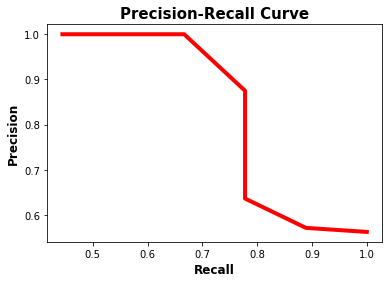

In [18]:
import matplotlib.pyplot as plt
plt.plot(recalls, precisions, linewidth=4, color="red")
plt.xlabel("Recall", fontsize=12, fontweight='bold')
plt.ylabel("Precision", fontsize=12, fontweight='bold')
plt.title("Precision-Recall Curve", fontsize=15, fontweight="bold")
plt.show()

## 3) F1 Score

Graphically deciding the best values for both the precision and recall might work using the previous figure because the curve is not complex. A better way is to use a metric called the f1 score, which is calculated according to the next equation.

$$\text{F1_score}=2\frac{\text{Precision}.\text{Recall}}{\text{Precision}+\text{Recall}}$$

In [19]:
f1 = 2 * ((numpy.array(precisions) * numpy.array(recalls)) / (numpy.array(precisions) + numpy.array(recalls)))
print("F1 score: ",f1)

F1 score:  [0.72       0.69565217 0.69565217 0.7        0.73684211 0.82352941
 0.82352941 0.8        0.71428571 0.61538462]


## 4) Average Precision (AP)

The average precision (AP) is a way to summarize the precision-recall curve into a single value representing the average of all precisions. The AP is calculated according to the next equation. Using a loop that goes through all precisions/recalls, the difference between the current and next recalls is calculated and then multiplied by the current precision. In other words, the AP is the weighted sum of precisions at each threshold where the weight is the increase in recall.

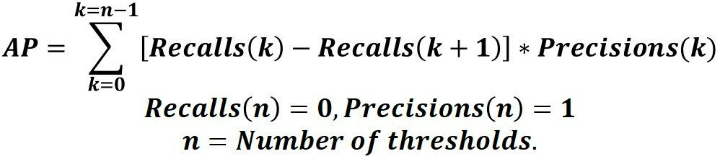

In [20]:
from IPython.display import Image
Image(filename = "D:\BCCD_YOLO\AP.png")

In [21]:
precisions.append(1)
recalls.append(0)

precisions = numpy.array(precisions)
recalls = numpy.array(recalls)

AP = numpy.sum((recalls[:-1] - recalls[1:]) * precisions[:-1])
print(AP)

0.8898809523809523


## 5) Intersection over Union (IoU)

To train an object detection model, usually, there are 2 inputs:

An image.
Ground-truth bounding boxes for each object in the image.
The model predicts the bounding boxes of the detected objects. It is expected that the predicted box will not match exactly the ground-truth box. The next figure shows a cat image. The ground-truth box of the object is in red while the predicted one is in yellow. Based on the visualization of the 2 boxes, is the model made a good prediction with a high match score?

It is difficult to subjectively evaluate the model predictions. For example, someone may conclude that there is a 50% match while someone else notices that there is a 60% match.

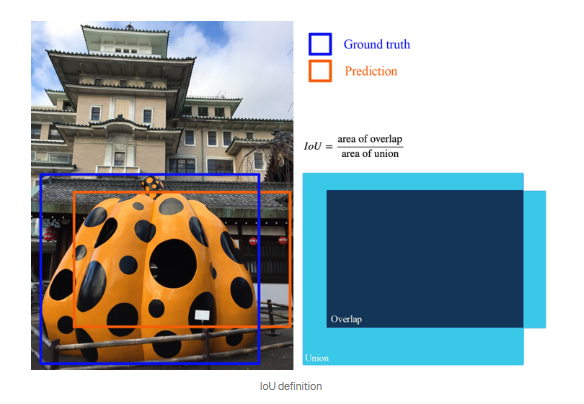

In [22]:
from IPython.display import Image
Image(filename = "D:\BCCD_YOLO\IOU.png")

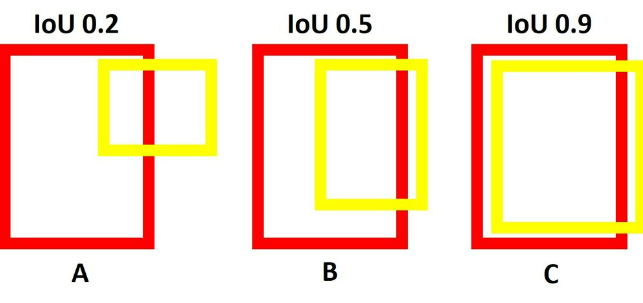

In [23]:
Image(filename = "D:\BCCD_YOLO\IOU_thress.png")

In [25]:
import imageio
import matplotlib.pyplot
import matplotlib.patches

def intersection_over_union(gt_box, pred_box):
    inter_box_top_left = [max(gt_box[0], pred_box[0]), max(gt_box[1], pred_box[1])]
    inter_box_bottom_right = [min(gt_box[0]+gt_box[2], pred_box[0]+pred_box[2]), min(gt_box[1]+gt_box[3], pred_box[1]+pred_box[3])]

    inter_box_w = inter_box_bottom_right[0] - inter_box_top_left[0]
    inter_box_h = inter_box_bottom_right[1] - inter_box_top_left[1]

    intersection = inter_box_w * inter_box_h
    union = gt_box[2] * gt_box[3] + pred_box[2] * pred_box[3] - intersection
    
    iou = intersection / union

    return iou, intersection, union


To objectively judge whether the model predicted the box location correctly or not, a threshold is used. If the model predicts a box with an IoU score greater than or equal to the threshold, then there is a high overlap between the predicted box and one of the ground-truth boxes. This means the model was able to detect an object successfully. The detected region is classified as Positive (i.e. contains an object).

$$\text{Class} = \begin{cases}
\text{Positive} \rightarrow\text{IOU} >= \text{Threshold}\\
\text{Positive} \rightarrow \text{IOU} < \text{Threshold}
\end{cases}$$

## 6) Mean Average Precision (mAP) for Object Detection

Usually, the object detection models are evaluated with different IoU thresholds where each threshold may give different predictions from the other thresholds. Assume that the model is fed by an image that has 10 objects distributed across 2 classes. How to calculate the mAP?

To calculate the mAP, start by calculating the AP for each class. The mean of the APs for all classes is the mAP.

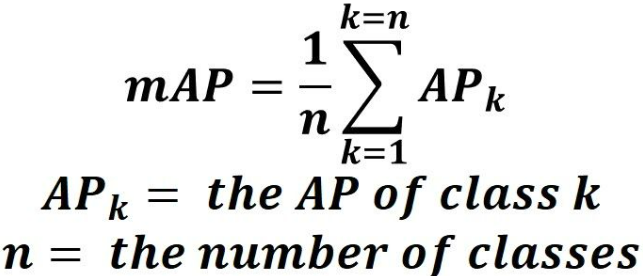

In [26]:
Image(filename = "D:\BCCD_YOLO\MAP.png")

Assuming that the dataset used has only 2 classes. For the first class, here are the ground-truth labels and predicted scores in the y_true and pred_scores variables, respectively.

In [45]:
def cal_MAP(y_true, pred_scores):
    thresholds = numpy.arange(start=0.2, stop=0.9, step=0.05)
    precisions, recalls = precision_recall_curve(y_true=y_true, 
                                             pred_scores=pred_scores, 
                                             thresholds=thresholds)
    precisions.append(1)
    recalls.append(0)

    precisions = numpy.array(precisions)
    recalls = numpy.array(recalls)
    AP = numpy.sum((recalls[:-1] - recalls[1:]) * precisions[:-1])
    return AP

In [46]:
#Class 1
y_true = ["positive", "negative", "positive", "negative", "positive", "positive", "positive", "negative", "positive", "negative"]

pred_scores = [0.7, 0.3, 0.5, 0.6, 0.55, 0.9, 0.75, 0.2, 0.8, 0.3]
print("AP for class 1: {}".format(cal_MAP(y_true, pred_scores)))

AP for class 1: 0.9484126984126984


In [47]:
# Class 2: 
y_true2 = ["negative", "positive", "positive", "negative", "negative", "positive", "positive", "positive", "negative", "positive"]

pred_scores2 = [0.32, 0.9, 0.5, 0.1, 0.25, 0.9, 0.55, 0.3, 0.35, 0.85]
print("AP for class 2: {}".format(cal_MAP(y_true2, pred_scores2)))

AP for class 2: 0.9583333333333334


In [48]:
mAP = (cal_MAP(y_true, pred_scores) + cal_MAP(y_true2, pred_scores2))/2
print("MAP: ",mAP)

MAP:  0.9533730158730158
